# Парное выравнивание

# Порядок сдачи домашнего

Вам требуется создать гит репозиторий куда вы будете складывать все ваши домашние. Под каждое домашнее вы создаете отдельную ветку куда вносите все изменения в рамках домашнего. Как только домашнее готово - создаете пулл реквест (обратите внимание что в пулл реквесте должны быть отражены все изменения в рамках домашнего). Ревьювером назначаете http://github.com/michael15346/ .
Перед сдачей проверьте код, напишите тесты. Не забудьте про PEP8, например, с помощью flake8. Задание нужно делать в jupyter notebook.

**Дедлайн - 21 октября 10:00**

# Введение

**Выравнивание последовательностей** — фундаментальный инструмент в биоинформатике, позволяющий сравнивать биологические последовательности (ДНК, РНК, белки) для выявления сходства, которое может указывать на функциональные, структурные или эволюционные связи между ними.

**Парное выравнивание** подразумевает сравнение двух последовательностей для определения наилучшего соответствия между их элементами (нуклеотидами или аминокислотами). Существует два основных типа парного выравнивания:

- **Глобальное выравнивание**: направлено на выравнивание всей длины двух последовательностей, максимально учитывая все элементы.
- **Локальное выравнивание**: нацелено на поиск наилучшего соответствующего участка внутри двух последовательностей.

В данном домашнем задании мы с вами сконцентрируемся на **глобальном выравнивании**.

### Пример парного выравнивания

Рассмотрим две нуклеотидные последовательности:

```
Последовательность 1 (Seq1): A G C T A C G A
Последовательность 2 (Seq2): G C T A G A
```

**Глобальное выравнивание** (учитывает всю длину последовательностей):

```
Seq1: A G C T A C G A
Seq2: - G C T A - G A
```

### Значение выравнивания последовательностей

- **Эволюционные связи**: Сходство между последовательностями может указывать на общих предков.
- **Функциональные домены**: Выравнивание помогает идентифицировать консервативные участки, важные для функции белка или нуклеиновой кислоты.
- **Геномные исследования**: Используется для аннотации генов, предсказания структур и понимания генетических вариаций.

## Алгоритм выравнивания

- Для автоматизации процесса выравнивания используется **Алгоритм Нидлмана-Вунша**. Он предназначен для глобального выравнивания и использует динамическое программирование для нахождения оптимального выравнивания по всей длине последовательностей. 
- Для оценки сходства при выравнивании белковых последовательностей используется матрица **BLOSUM** (Blocks Substitution Matrix). Матрицы BLOSUM создаются на основе статистического анализа реальных белковых множественных выравниваний последовательностей.

### Пример множественного выравнивания (для построения матрциы BLOSUM)

Рассмотрим нуклеотидные последовательности:

```
Последовательность 1 (Seq1): A G C T A C G T G T C G C T G A A T C T A T G A C T
Последовательность 2 (Seq2): G C T A G A G C A A G G C A A C T G C A T C T
Последовательность 3 (Seq3): A C T G C A C C C A T G A A C C T C G C G C T
Последовательность 4 (Seq4): A C T G C A C C C A T G A A C C T C T C G C T
Последовательность 5 (Seq5): A C T G C A C C C A T G A A C C T C T C G C T
Последовательность 6 (Seq6): A C T G C A C C C A T G A A C C T C T C A C T
Последовательность 7 (Seq7): A C T G C A C C C A T G A A C C T C T C A C T
```

**Множественное выравнивание**:

```
Seq1: A G C T A C G T G T C G C T G A A T C T A T G A C T
Seq2: - G C T A - G A G C A - A G G C A A C T G C A T C T
Seq3: A - C T G - C A C C C - A T G A A C C T C G C G C T
Seq4: A - C T G - C A C C C - A T G A A C C T C T C G C T
Seq5: A - C T G - C A C C C - A T G A A C C T C T C G C T
Seq6: A - C T G - C A C C C - A T G A A C C T C T C A C T
Seq7: A - C T G - C A C C C - A T G A A C C T C T C A C T
```

Перед тем как приступать к реализации парного выравнивания давайте научимся считать матрицу BLOSUM.

# Матрица BLOSUM

## Подсчет частот пар нуклеотидов

### Шаг 1.1: Генерация пар нуклеотидов

Напишите функцию `generate_pairs(alignments)`, которая проходит по всем позициям выравнивания (одного столбца) и генерирует все возможные пары нуклеотидов в этой позиции.

**Пример**:

Рассмотрим на примере множественного выравнивания выше:

```
generate_pairs(["A", "A", "G"])
[('A', 'A'), ('A', 'G'), ('A', 'G')]

generate_pairs(["T", "T", "T"])
[('T', 'T'), ('T', 'T'), ('T', 'T')]

generate_pairs(["G", "G", "-"])
[('G', 'G'), ('G', '-'), ('G', '-')]

len(generate_pairs(['A', 'T', 'G', 'G', 'G', 'A', 'A']))
21
```

In [31]:
alignments = ["AGCTACGTGTCGCTGAATCTATGACT", 
              "-GCTA-GAGCA-AGGCAACTGCATCT", 
              "A-CTG-CACCC-ATGAACCTCGCGCT",
              "A-CTG-CACCC-ATGAACCTCTCGCT",
              "A-CTG-CACCC-ATGAACCTCTCGCT",
              "A-CTG-CACCC-ATGAACCTCTCACT",
              "A-CTG-CACCC-ATGAACCTCTCACT"
             ]

In [32]:
def generate_pairs(alignments):
    list_letters=[]
    list_couples=[]
    for j in range(len(alignments[0])):
        list=[]
        for i in range(len(alignments)):
            if alignments[i][j]=="A":
                list.append("A")
            if alignments[i][j]=="G":
                list.append("G")
            if alignments[i][j]=="C":
                list.append("C")
            if alignments[i][j]=="T":
                list.append("T")
            if alignments[i][j]=="-":
                list.append("-")
        list_letters.append(list)
    for i in range(len(list_letters)):
        for j in range(len(list_letters[0])):
            g=j+1
            while g!=len(list_letters[0]):
                if list_letters[i][j]=="-":
                    list_couples.append((list_letters[i][g],list_letters[i][j]))
                elif list_letters[i][g]=="A":
                    list_couples.append((list_letters[i][g],list_letters[i][j]))
                else: 
                    list_couples.append((list_letters[i][j],list_letters[i][g]))
                g+=1
    return list_couples


### Шаг 1.2: Подсчет частот пар

Используйте полученные пары для подсчета частоты каждой пары нуклеотидов. Создайте словарь `pair_counts`, где ключом является кортеж из двух нуклеотидов, а значением — количество их совместных появлений. Пропуски в выравнивании нужно пропускать (если один из символ в выравнивании `'-'`)

**Подсказка**: Учитывайте, что матрица симметрична, поэтому пары `('A','G')` и `('G','A')` должны считаться одинаковыми.

**Пример**:

```
pair_counts = count_pairs(alignments)
pair_counts
{('A', 'A'): 85, ('G', 'G'): 37, ('C', 'C'): 143, ('T', 'T'): 88, ('A', 'G'): 21, 
 ('C', 'G'): 31, ('A', 'T'): 10, ('C', 'T'): 16, ('A', 'C'): 33, ('G', 'T'): 14}
```

In [33]:
def count_pairs(alignments):
    pairs_list=generate_pairs(alignments)
    set_pairs=set(pairs_list)
    set_pass=set()
    for i in range(len(pairs_list)):
        pairs_list[i]=list(pairs_list[i])
    for i in range(len(pairs_list)):
        for j in range(len(pairs_list)):
            if pairs_list[i][0]==pairs_list[j][1] and pairs_list[i][1]==pairs_list[j][0]:
                pairs_list[i][0]=pairs_list[j][0]
                pairs_list[i][1]=pairs_list[j][1]
    for i in range(len(pairs_list)):
         pairs_list[i]=tuple(pairs_list[i])
    for i in range(len(pairs_list)):
        if '-' in pairs_list[i]:
            set_pass.add(pairs_list[i])
    set_pairs=set(list(pairs_list))
    pairs_list_support=set_pairs-set_pass
    pairs_list_support=list(pairs_list_support)
    count_list=[]
    for i in range(len(pairs_list_support)):
        count=0
        for j in range(len(pairs_list)):
            if pairs_list_support[i]==pairs_list[j]:
                count+=1
        count_list.append(count)
    pair_counts=dict(zip(pairs_list_support,count_list))
    return pair_counts
count_pairs(alignments)
    

{('A', 'A'): 85,
 ('T', 'G'): 14,
 ('A', 'G'): 21,
 ('A', 'C'): 33,
 ('C', 'T'): 16,
 ('T', 'T'): 88,
 ('A', 'T'): 10,
 ('G', 'G'): 37,
 ('G', 'C'): 31,
 ('C', 'C'): 143}

## Вычисление ожидаемых частот

Реализуйте функцию `calculate_frequencies`, которая будет вычислять частоту нуклеотида по множественному выравниванию

**Пример**:

```
freqs = calculate_frequencies(alignments)
print("Частоты:")
for x, freq in freqs.items():
    print(f"{x}: {freq:.4f}")
    
Частоты:
A: 0.2439
G: 0.1585
C: 0.3780
T: 0.2195
```

In [34]:
def calculate_frequencies(alignments):
    frequencies=[]
    nucleotide=['A','G','C','T']
    number_nullotides=0
    for i in range(len(alignments)):
        for j in range(len(alignments[i])):
            if alignments[i][j]!='-':
                number_nullotides+=1
    for i in range(4):
        frequencies.append(0)
    for k in range(len(nucleotide)):
        for i in range(len(alignments)):
            for j in range(len(alignments[i])):
                if alignments[i][j]==nucleotide[k]:
                    frequencies[k]+=1
    for i in range(len(frequencies)):
        frequencies[i]=frequencies[i]/number_nullotides
    freqs=dict(zip(nucleotide,frequencies))   
    return freqs
freqs=calculate_frequencies(alignments)
print("Частоты")
for x, v in freqs.items():
    print(x,":",round(v,4) )

Частоты
A : 0.2439
G : 0.1585
C : 0.378
T : 0.2195


##  Расчет логарифмических коэффициентов

- Для каждой пары нуклеотидов `(x, y)` вычислите логарифмический коэффициент замены по формуле:
    
$$S(x, y) = scale * \log_2 \left( \frac{observed\_freq[x, y]}{expected\_freq[x, y]} \right)$$

- Здесь `observed_freq` — наблюдаемая частота пары из `pair_counts` деленное на общее количество пар, а `expected_freq` — ожидаемая частота, которую можно вычислить как `expected_freq[x, y] = freqs[x] * freqs[y]`

- Для удобства представления округлите значения `S(x, y)` до целых чисел, умножив на масштабный фактор (например, 3).

**Пример:**

```python
scores = calculate_scores(pair_counts, freqs)
scores
{('A', 'A'): 5, ('G', 'G'): 5, ('C', 'C'): 3, ('T', 'T'): 6, ('A', 'G'): 1,
 ('C', 'G'): 0, ('A', 'T'): -4, ('C', 'T'): -4, ('A', 'C'): -1, ('G', 'T'): -1}
```


In [35]:
import math
def calculate_scores(pair_counts, freqs, scale=3):
    many_freqs=list(freqs.values())
    for i in range(len(many_freqs)):
        many_freqs[i]=round(many_freqs[i],4)
    nucleotide=['A','G','C','T']
    many_freqs_pairs=list(pair_counts.values())
    sum_freqs_pairs=sum(many_freqs_pairs)
    many_pairs=list(pair_counts.keys())
    many_observed_freq=[]
    many_expected_freq=[]
    many_pairs_good=[]
    many_log=[]
    for i in range(len(many_freqs)):
        for j in range(i,len(many_freqs)):
            expected_freq=many_freqs[i]*many_freqs[j]
            many_expected_freq.append(expected_freq)
    for i in range(len(nucleotide)):
        for j in range(len(nucleotide)):
            for k in range(len(many_pairs)):
                if (nucleotide[i],nucleotide[j])==many_pairs[k]:
                    many_pairs_good.append((nucleotide[i],nucleotide[j]))
    for i in range(len(many_pairs)):
        for j in range(len(many_pairs_good)):
            if many_pairs_good[i]==many_pairs[j]:
                many_observed_freq.append(many_freqs_pairs[j]/sum_freqs_pairs)
    for i in range(len(many_pairs_good)):
        many_log.append(round(scale*math.log(many_observed_freq[i]/many_expected_freq[i],2)))
    result=dict(zip(many_pairs_good,many_log))
    return result
calculate_scores(count_pairs(alignments),calculate_frequencies(alignments))

{('A', 'A'): 5,
 ('A', 'G'): 1,
 ('A', 'C'): -1,
 ('A', 'T'): -4,
 ('G', 'G'): 5,
 ('G', 'C'): 0,
 ('C', 'C'): 9,
 ('C', 'T'): -6,
 ('T', 'G'): -5,
 ('T', 'T'): 6}


## Составление матрицы BLOSUM

### Шаг 4.1: Заполнение матрицы

- Реализуйте функцию `create_blosum_matrix`, для создания BLOSUM матрицы.
- Используйте рассчитанные ранее логарифмические коэффициенты `scores` для заполнения матрицы.
- Учитывайте, что матрица симметрична: `S(x, y) = S(y, x)`.

**Пример:**

```python
blosum_matrix = create_blosum_matrix(scores, nucleotides)
blosum_matrix
{'A': {'A': 5, 'G': 1, 'C': -1, 'T': -4},
 'G': {'A': 1, 'G': 5, 'C': 0, 'T': -1},
 'C': {'A': -1, 'G': 0, 'C': 3, 'T': -4},
 'T': {'A': -4, 'G': -1, 'C': -4, 'T': 6}}
```


In [36]:
def create_blosum_matrix(scores, nucleotides):
    many_scores=list(scores.values())
    many_pairs=list(scores.keys())
    many_dict=[]
    lines=[[],[],[],[]]
    for k in range(len(nucleotides)):
        for i in range(len(nucleotides)):
            for j in range(len(many_pairs)):
                if (many_pairs[j][0]==nucleotides[k] and many_pairs[j][1]==nucleotides[i]) or (many_pairs[j][1]==nucleotides[k] and many_pairs[j][0]==nucleotides[i]):
                    lines[k].append(many_scores[j])
    for i in range(len(nucleotides)):
        many_dict.append(dict(zip(nucleotides,lines[i])))
    result=dict(zip(nucleotides,many_dict))
    return result
create_blosum_matrix(calculate_scores(count_pairs(alignments),calculate_frequencies(alignments)),['A','G','C','T'])
    

{'A': {'A': 5, 'G': 1, 'C': -1, 'T': -4},
 'G': {'A': 1, 'G': 5, 'C': 0, 'T': -5},
 'C': {'A': -1, 'G': 0, 'C': 9, 'T': -6},
 'T': {'A': -4, 'G': -5, 'C': -6, 'T': 6}}

### Шаг 4.2: Вывод матрицы

- Выведите матрицу BLOSUM в удобочитаемом формате, например, как таблицу с заголовками.

**Пример:**

```python
print_blosum_matrix(blosum_matrix, nucleotides)
    A   G   C   T
A   5   1  -1  -4
G   1   5   0  -1
C  -1   0   3  -4
T  -4  -1  -4   6
```

In [37]:
import pandas as pd
def print_blosum_matrix(matrix, nucleotides):
    table=pd.DataFrame.from_dict(matrix)
    return table
print_blosum_matrix(create_blosum_matrix(calculate_scores(count_pairs(alignments),calculate_frequencies(alignments)),['A','G','C','T']),['A','G','C','T'])

,A,G,C,T
A,5,1,-1,-4
G,1,5,0,-5
C,-1,0,9,-6
T,-4,-5,-6,6


## Визуализация результатов

Запустите код для визуализации результатов. Здесь вам понадобится установить библиотеки. Для этого в консоли выполните:
```
pip install numpy
pip install seaborn
pip install matplotlib
```

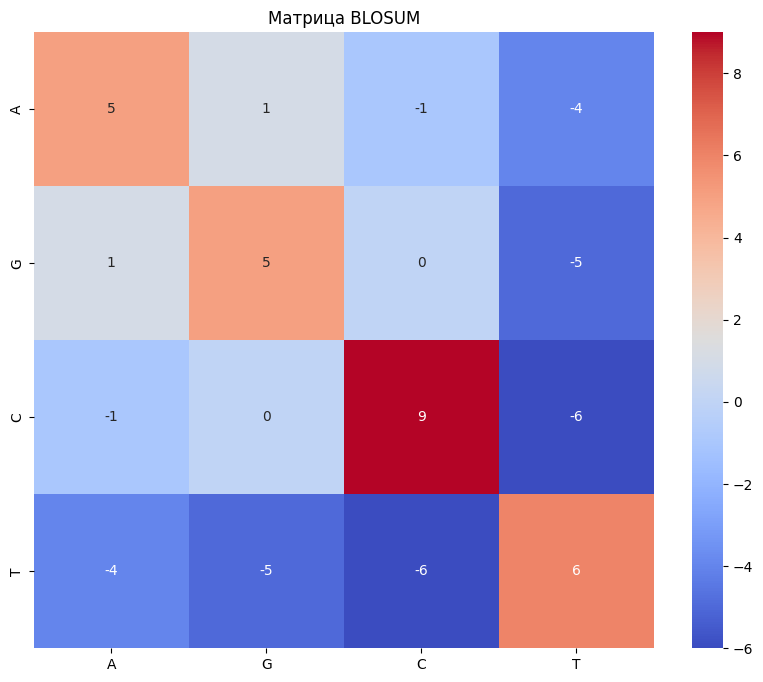

In [38]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def visualize_blosum_matrix(matrix, nucleotides):
    data = np.array([[matrix[x][y] for y in nucleotides] for x in nucleotides])
    plt.figure(figsize=(10, 8))
    sns.heatmap(data, xticklabels=nucleotides, yticklabels=nucleotides, annot=True, cmap="coolwarm")
    plt.title("Матрица BLOSUM")
    plt.show()

# Пример использования
visualize_blosum_matrix(print_blosum_matrix(create_blosum_matrix(calculate_scores(count_pairs(alignments),calculate_frequencies(alignments)),['A','G','C','T']),['A','G','C','T']),['A','G','C','T'])

# Реализация алгоритма Нидлмана-Вунша

### Шаг 5: Инициализация матрицы динамического программирования

Теперь перейдём к реализации алгоритма [Нидлмана-Вунша](https://en.wikipedia.org/wiki/Needleman%E2%80%93Wunsch_algorithm).

Реализуйте функцию `init`, которая по $m, n$ и ошибке $\sigma$ строит матрицу c $m + 1$ строкой и $n + 1$ столбцом:

$$A_{m,n} = \begin{pmatrix} 0 & -\sigma & \cdots & -n \sigma \\ -\sigma & 0 & \cdots & 0 \\ \vdots & \vdots & \ddots & \vdots \\ -m\sigma & 0 & \cdots & 0 \end{pmatrix} $$

**Пример:**

```python
print(init(3, 3, 4))
[[0, -4, -8, -12], [-4, 0, 0, 0], [-8, 0, 0, 0], [-12, 0, 0, 0]]
```

In [39]:
def init(rows, cols, gap_penalty=10):
    matrix=[]
    for i in range(rows+1):
        matrix_line=[]
        for j in range(cols+1):
            matrix_line.append(-i*gap_penalty-j*gap_penalty)
        matrix.append(matrix_line)
    for i in range(1,rows+1):
        for j in range(1,cols+1):
            matrix[i][j]=0
    return matrix

### Шаг 6: Заполнение матрицы динамического программирования

Пусть `a` и `b` - две последовательности, которые хотим выравнять. Теперь имея пустую матрицу, нужно научиться её заполнять. Для этого вспомним, как вычисляется очередной элемент матрицы:

$$A_{i \ j} = max \begin{cases} A_{i-1 \ j-1} + s(a_{i},b_{j}) & \ \text{Match / Mismatch}\\ A_{i \ j-1} - \sigma & \ \text{Insertion} \\ A_{i-1\ j} - \sigma & \ \text{Deletion} \end{cases}$$

где $s(a_{i},b_{j})$ - значение матрицы BLOSUM для нуклеотидов $a_{i}$ и $b_{j}$, $\sigma$ - штраф за пропуск символа в выравнивании (параметр)

### Шаг 7: Вычисление значения матрицы

Реализуйте функцию `get_new_score`, которая принимает на вход 5 параметров - `up` ($A_{i-1\ j}$), `left` ($A_{i \ j-1}$), `middle` ($A_{i-1 \ j-1}$), `s_score` ($s(a_{i},b_{j})$), `gap_penalty` ($\sigma$), и вычисляет значение для матрицы $A_{i\ j}$

**Пример:**

```python
print(get_new_score(0, 10, 2, 0, 2))
8
print(get_new_score(-16, -7, -14, 0, 2))
-9
```

In [40]:
def get_new_score(up, left, middle, s_score, gap_penalty):
    elemnts=[]
    elemnts.append(middle+s_score)
    elemnts.append(up-gap_penalty)
    elemnts.append(left-gap_penalty)
    return max(elemnts)
get_new_score(0,10,2,0,2)

8

### Шаг 8 Заполнение матрицы

Реализуйте функцию `align`,  которая на вход принимает две последовательности ДНК, штраф за пропуск ($\sigma$), матрицу BLOSUM и возвращает заполненную матрицу `A`.

**Пример:**

```python
top_seq = "AGTACGCA"
bottom_seq = "TATGC"
gap_penalty = 2

print(align(top_seq, bottom_seq, gap_penalty, blosum_matrix))
[[0, -2, -4, -6, -8, -10, -12, -14, -16],
 [-2, -4, -3, 2, 0, -2, -4, -6, -8],
 [-4, 3, 1, 0, 7, 5, 3, 1, -1],
 [-6, 1, 2, 7, 5, 3, 4, 2, 0],
 [-8, -1, 6, 5, 8, 6, 8, 6, 4],
 [-10, -3, 4, 3, 6, 11, 9, 11, 9]]
```

In [41]:
top_seq = "AGTACGCA"
bottom_seq = "TATGC"
gap_penalty = 2
blosum_matrix=create_blosum_matrix(calculate_scores(count_pairs(alignments),calculate_frequencies(alignments)),['A','G','C','T'])

In [42]:
def align(top_seq, bottom_seq, gap_penalty, blosum_matrix):
    matrix=init(len(bottom_seq),len(top_seq),gap_penalty)
    for i in range(1,len(matrix)):
        for j in range(1,len(matrix[0])):
            matrix[i][j]+=get_new_score(matrix[i-1][j],matrix[i][j-1],matrix[i-1][j-1],blosum_matrix[bottom_seq[i-1]][top_seq[j-1]],2)
    return matrix
align(top_seq, bottom_seq, gap_penalty, blosum_matrix)

[[0, -2, -4, -6, -8, -10, -12, -14, -16],
 [-2, -4, -6, 2, 0, -2, -4, -6, -8],
 [-4, 3, 1, 0, 7, 5, 3, 1, -1],
 [-6, 1, -1, 7, 5, 3, 1, -1, -3],
 [-8, -1, 6, 5, 8, 6, 8, 6, 4],
 [-10, -3, 4, 3, 6, 17, 15, 17, 15]]

### Шаг 9: Построение выравнивания

Теперь имея матрицу выравнивания построим самое выравнивание.

Реализуйте функцию get_alignment, которая по двум последовательностям, матрице выравнивания, штрафа за пропуски, бонусам за совпадение/несовпадение нуклеотидов строит выравнивание.

**Пример:**

```python

top_seq = "AGTACGCA"
bottom_seq = "TATGC"
gap_penalty = 2
sm = align(top_seq, bottom_seq, gap_penalty, blosum_matrix)
aligns = get_alignment(top_seq, bottom_seq, sm, gap_penalty, blosum_matrix)
print(aligns[0])
print(aligns[1])
TA-T--GC-
-AGTACGCA

top_seq = "AGTCTCCCCC"
bottom_seq = "ACTTCTACCCCAGC"
sm = align(top_seq, bottom_seq, gap_penalty, blosum_matrix)
aligns = get_alignment(top_seq, bottom_seq, sm, gap_penalty, blosum_matrix)
print(aligns[0])
print(aligns[1])
ACTTCTACCCCAGC
AGT-CT-CCCC--C
```

In [43]:
def get_alignment(top_seq, bottom_seq, sm, gap_penalty, blosum_matrix):
    alignment1, alignment2 = "", ""
    i, j = len(bottom_seq), len(top_seq)
    while i > 0 and j > 0:
        if sm[i][j] == sm[i-1][j-1] + blosum_matrix[bottom_seq[i-1]][top_seq[j-1]]:
            alignment1 += bottom_seq[i-1]
            alignment2 += top_seq[j-1]
            i -= 1
            j -= 1
        elif sm[i][j] == sm[i-1][j] - gap_penalty:
            alignment1 += bottom_seq[i-1]
            alignment2 += '-'
            i -= 1
        else:
            alignment1 += '-'
            alignment2 += top_seq[j-1]
            j -= 1
    while i > 0:
        alignment1 += botoom_seq[i-1]
        alignment2 += '-'
        i -= 1
    while j > 0:
        alignment1 += '-'
        alignment2 += top_seq[j-1]
        j -= 1
    aligns=[]
    aligns.append(alignment1[::-1])
    aligns.append(alignment2[::-1])
    return aligns

In [44]:
top_seq = "AGTACGCA"
bottom_seq = "TATGC"
gap_penalty = 2
sm = align(top_seq, bottom_seq, gap_penalty, blosum_matrix)
aligns = get_alignment(top_seq, bottom_seq, sm, gap_penalty, blosum_matrix)
print(aligns[0])
print(aligns[1])

--TA-TGC-
AGTAC-GCA


In [45]:
top_seq = "AGTCTCCCCC"
bottom_seq = "ACTTCTACCCCAGC"
sm = align(top_seq, bottom_seq, gap_penalty, blosum_matrix)
aligns = get_alignment(top_seq, bottom_seq, sm, gap_penalty, blosum_matrix)
print(aligns[0])
print(aligns[1])

ACTTCTACCCCAGC
AG-TCT-CCCC--C


## Поздравляю! Мы научились выравнивать ДНК!